# Telco Customer Churn Classification



## Problem Statement :

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

## Aim :
To classify the potential churn customers based on numerical and categorical features.

It is a binary classification problem for an imbalanced dataset.

## Dataset Attributes

customerID : Customer ID

gender : Whether the customer is a male or a female

SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)

Partner : Whether the customer has a partner or not (Yes, No)

Dependents : Whether the customer has dependents or not (Yes, No)

tenure : Number of months the customer has stayed with the company

PhoneService : Whether the customer has a phone service or not (Yes, No)

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract : The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges : The amount charged to the customer monthly

TotalCharges : The total amount charged to the customer

Churn : Whether the customer churned or not (Yes or No)

# Import the Necessary Libraries :


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present in the data!

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


The dataset has too many features with text data and are probably categorical features!

- Total Charges is a feature with numerical values but are stored in string datatype. First, we will convert this column into float.

In [7]:
#Converting DataFrame column elements from string to float using the following code line :

#data['TotalCharges'] = data['TotalCharges'].astype(float)

# Identify non-convertible values
non_convertible_values = data[data['TotalCharges'] == ' ']['TotalCharges']

# Print unique non-convertible values
print("Non-convertible values:", non_convertible_values.unique())

# Replace ' ' with NaN
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

# Convert the column to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

# Drop rows with ' ' in 'TotalCharges'
data = data[data['TotalCharges'] != ' ']

# Convert the column to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

data.drop(columns = ['customerID'], inplace = True)

Non-convertible values: [' ']


While converting the TotalCharges to float, an error occurred with the message describing that it could not convert string to float.

This error message popped up because of the empty strings present.

As these elements were defined as string, they did not appear as Null values and hence the missing values did not display anything.
E.g : a = ' '

We drop the customerID column as well!

Let's divide the features into numerical and categorical features.

We will also execute the label encoding transformation for categorical features.

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


We creating a deep copy of the orginal dataset and label encoding the text data.

Modifications in the original dataset will not be highlighted in this deep copy.

Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

We now again the descriptive stats of the data.

In [9]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7032.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2283.30,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2266.77,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.45,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1397.47,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3794.74,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


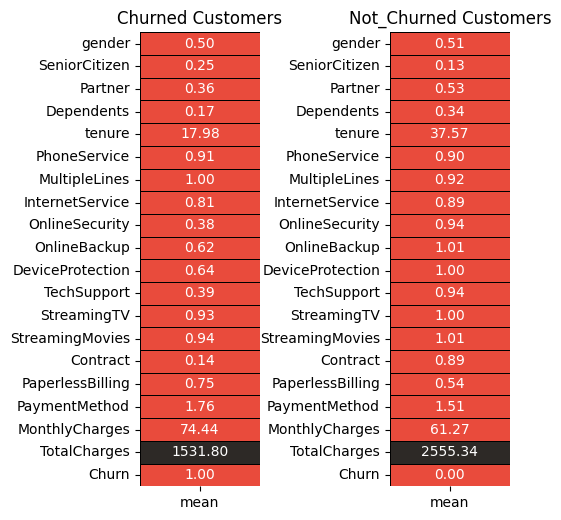

In [10]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)


Mean values of all the features for churned and not-churned customers.

Clearly, the customers that churned had a low mean tenure of 17.98 months as compared to those who continued with an average tenure period of 37.57 months.


Mean values of OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!

Churned customer's Contract value is much smaller than those of not-churned customers.

Mean MonthlyCharges of the churn customers, 74.44, is more than that of not-churn customers, 61.27.

Not-churned customers TotalCharges, 2555.34, is higher than churn customers, 1531.80.

From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.

The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.

We will now move on to the EDA section and look into the features with more detail!

# Exploratory Data Analysis

In [11]:
#Dividing features into Numerical and Categorical :

col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df1[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.

Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

Eg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

For this dataset, as the number of features are less, we can manually check the dataset as well.

## Target Variable Visualization (Churn) 

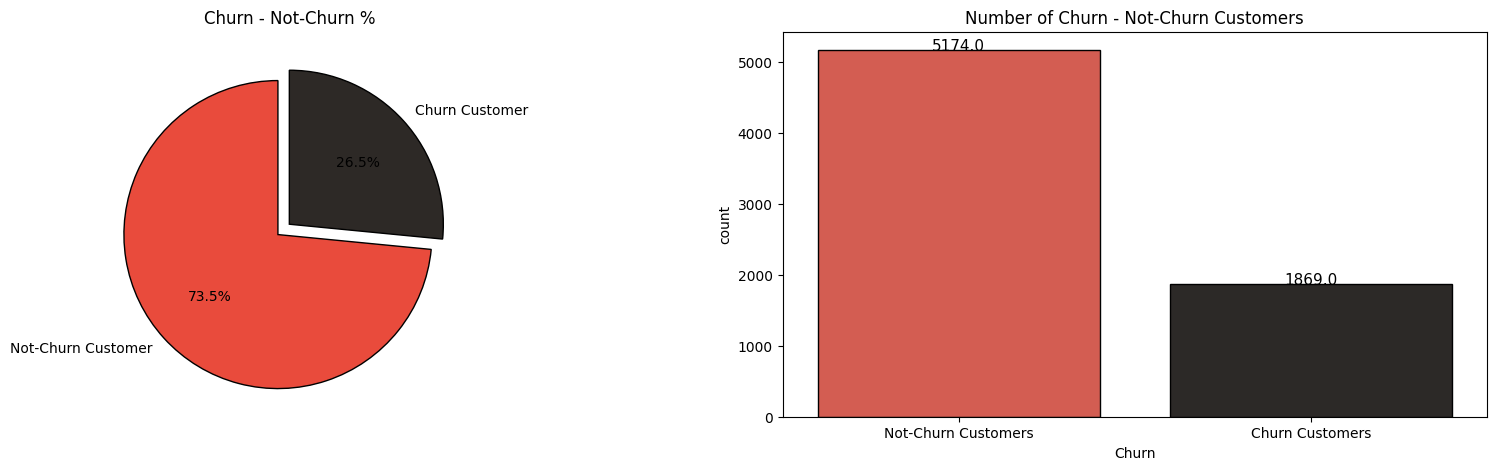

In [12]:
colors = ['#E94B3C','#2D2926']
# Assuming 'Churn' is a categorical variable with values 'Yes' and 'No'

l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie chart
axes[0].pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
            colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Churn - Not-Churn %')

# Countplot
ax = sns.countplot(x='Churn', data=df1, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

ax.set_title('Number of Churn - Not-Churn Customers')

plt.show()


The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!

Due to this, predictions will be biased towards Not-Churn customers.

Visualizations will also display this bias!

## Categorical Features vs Target Variable (Churn)

In [13]:
categorical_features.remove('Churn')


We will remove Churn, target variable, from the categorical features list for visualization purposes.

In [14]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

We have too many categorical features in this dataset!


We divide them into 3 groups depending on their values or based on the column name!

### Group 1 : Customer Information :
        
gender | SeniorCitizen | Partner | Dependents |

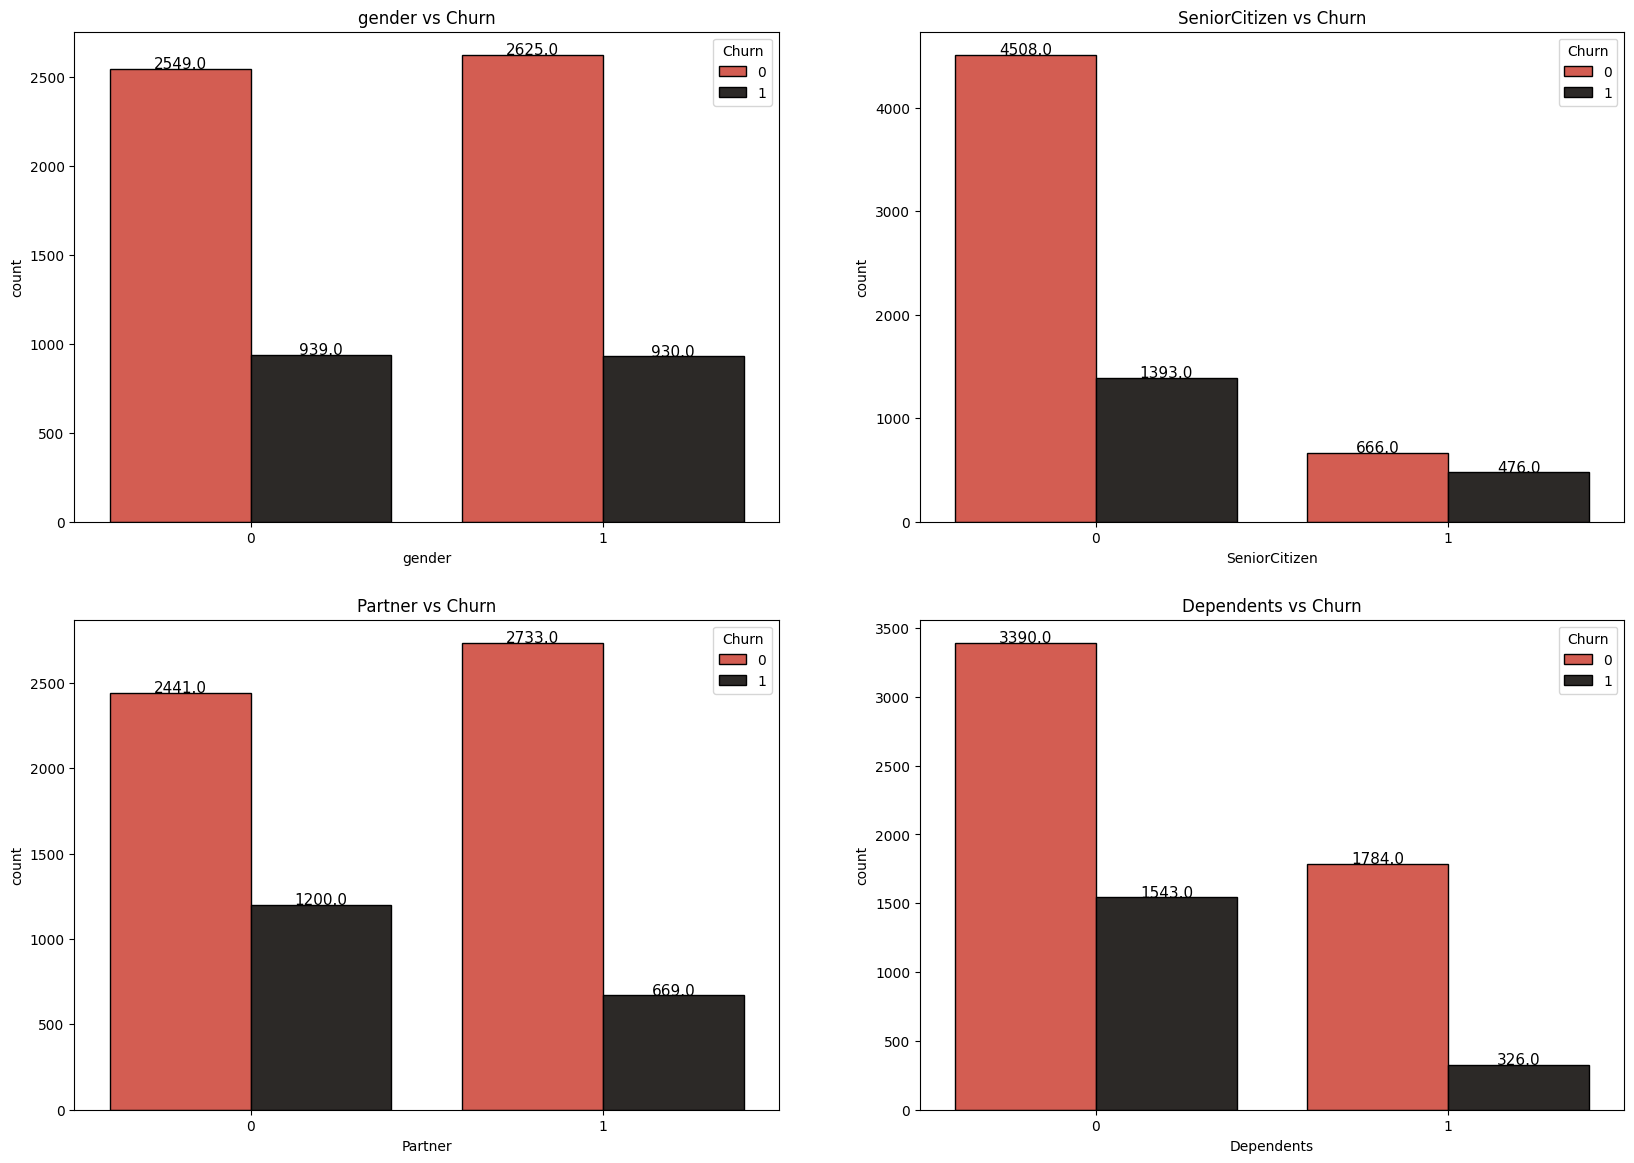

In [15]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

Customer churning for male & female customers is very similar to each other!

Similarly, number of SeniorCitizen customers is pretty low! Out of that, we can observe a near about 40% churn of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.

Customers who are housing with a Partner churned less as compared to those not living with a Partner.

Similarly, churning is high for the customers that don't have Dependents with them!

### Group 2: Services Subscribed by the Customer :
        
For visualization purposes, we will create 2 groups!

PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

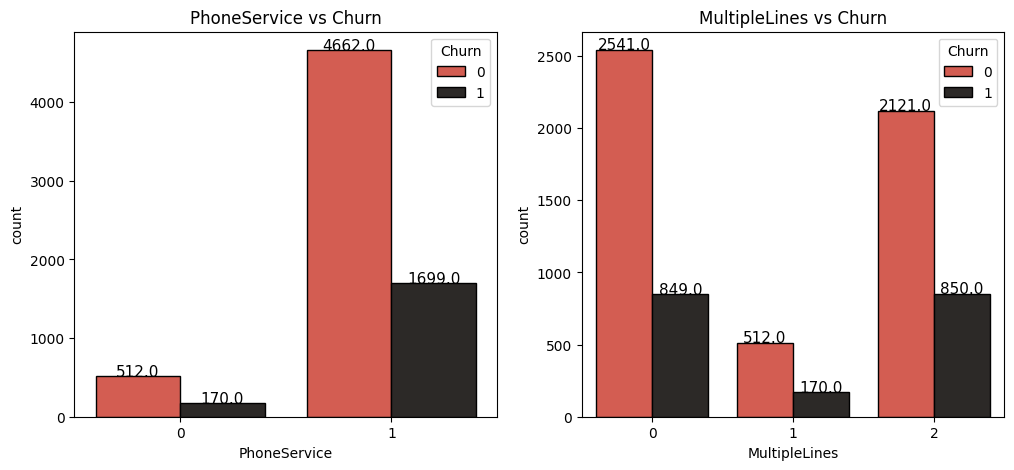

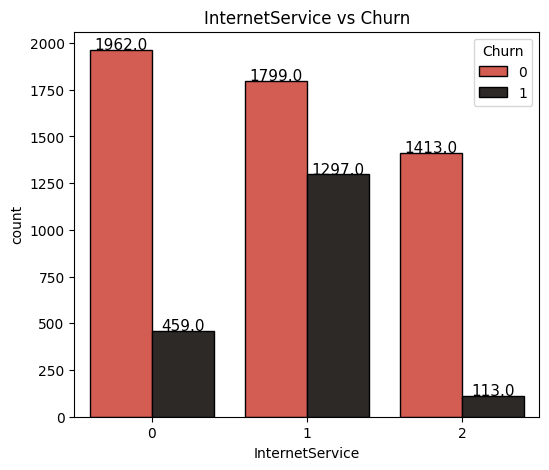

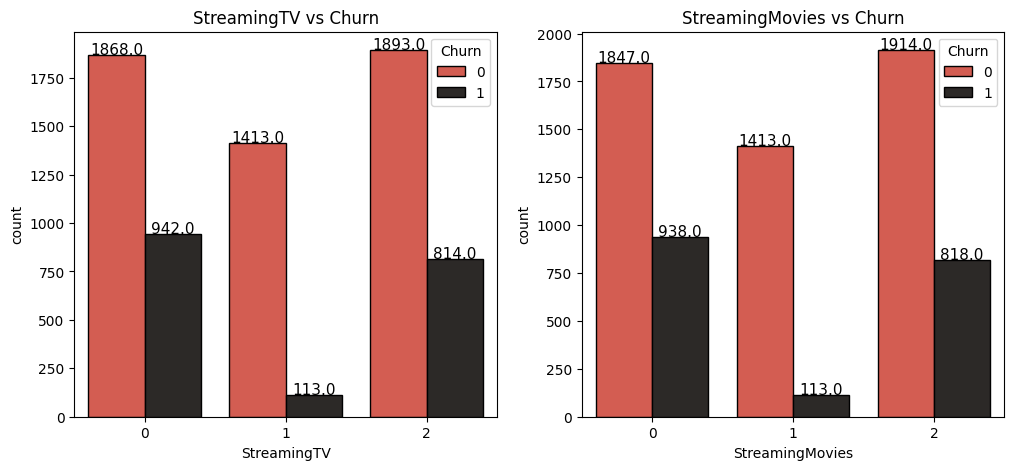

In [16]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x=l2[2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i + 3],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.

In case of MultipleLines, churn rate in when the Multiplelines are present or not is the same.

A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!

StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault!

### Group 2: Services Subscribed by the Customer :
        
OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

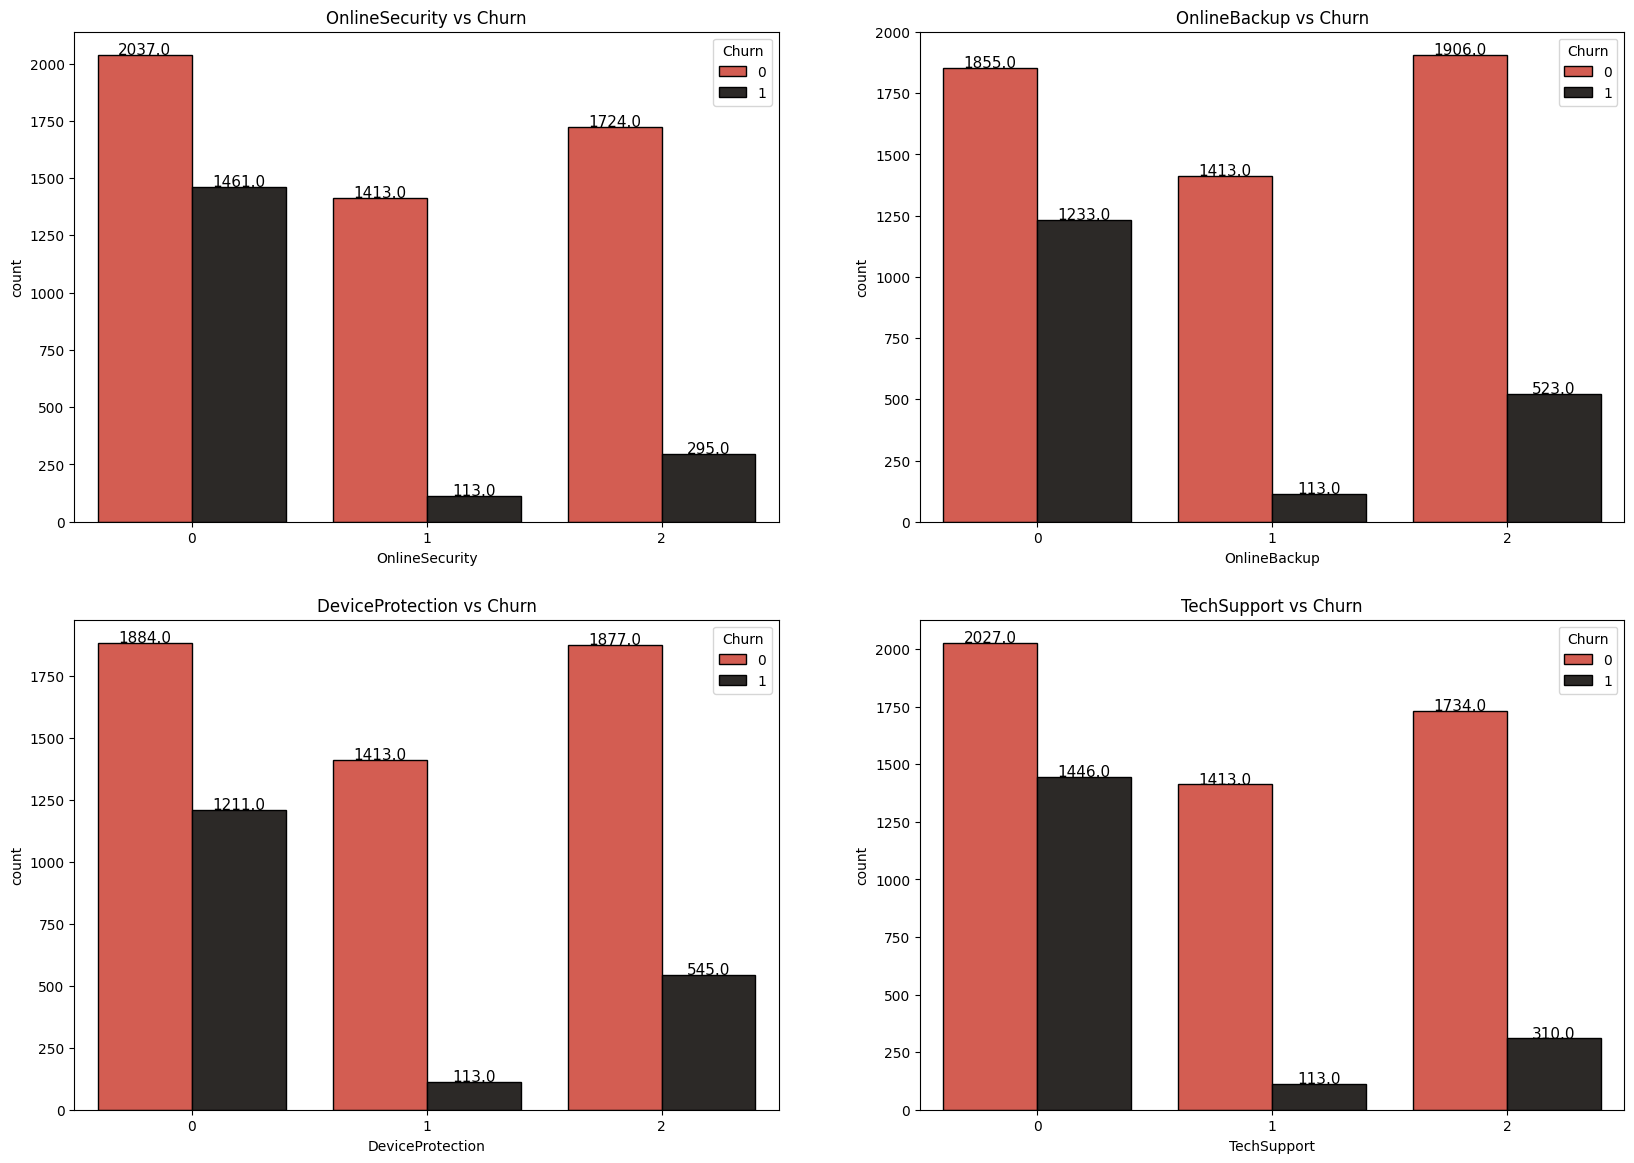

In [17]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x=l2[-4 + i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

When it comes down to catering the customers, services w.r.t OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport are crucial from the above visualizations!

A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.

### Group 3 : Contract | PaperlessBilling | PaymentMethod

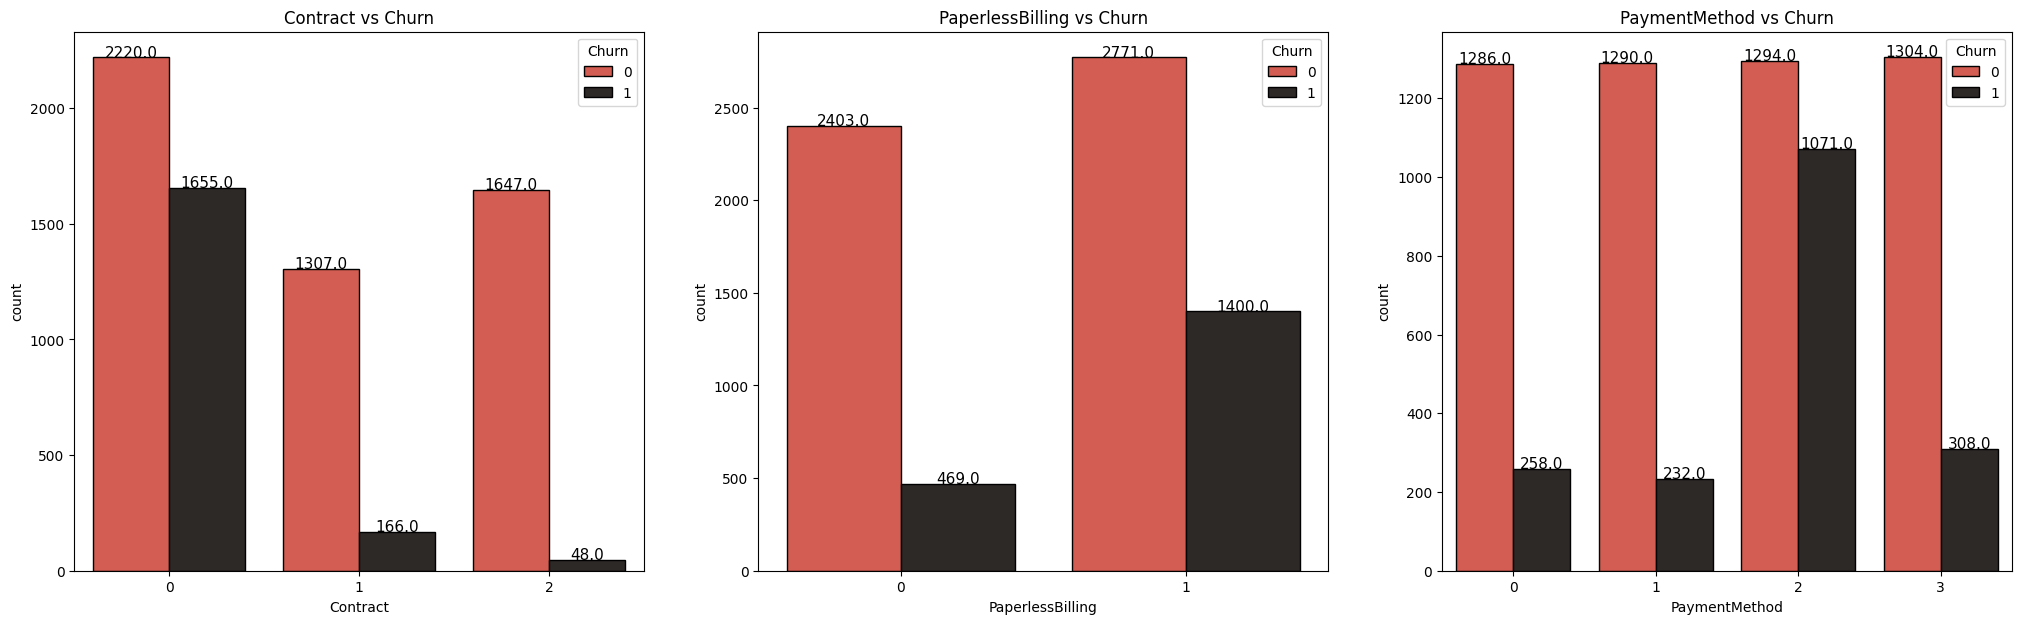

In [18]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=l3[0],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x=l3[1],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x=l3[2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
     ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

Customer churning for a Month-to-Month based Contract is quite high. This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out!

Another reason can be the overall experience with the internet service, streaming service and phone service were not consistent. Every customer has a different priority and hence if one of the 3 was upto par, the entire service was cutoff!

PaperlessBilling displays a high number of customers being churned out. This is probably because of some payment issue or receipt issues.

Customers clearly resented the Electronic check PaymentMethod. Out of the 2365 number of bills paid using Electronic check, a staggering 1071 customers exited the pool of service due to this payment method. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly

## Categorical Features vs Positive Target Variable (Churn Cases) :

We will now point our attention directly towards to the churn customers!


### Group 1 : Customer Information :
        
gender | SeniorCitizen | Partner | Dependents |

In [19]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts() 
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

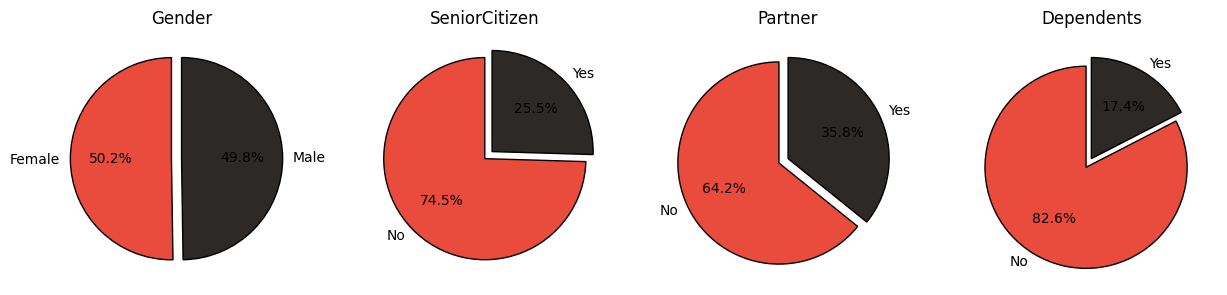

In [20]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

We can observe a clear cut 50% - 50% split between the male and female customers that have switched their services. Hence, the reason for switching is something related to the service or some process which the customers reacted badly!

75% of the churned customers are not SeniorCitizen! This is a major info that the company needs to divert it's attention towards!

Customers living by themselves have cutoff the services. From Partners & Dependents data, average of 73.4% of customers churned out were living by themselves.

### Group 2: Services Subscribed by the Customer :
        
PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

In [21]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

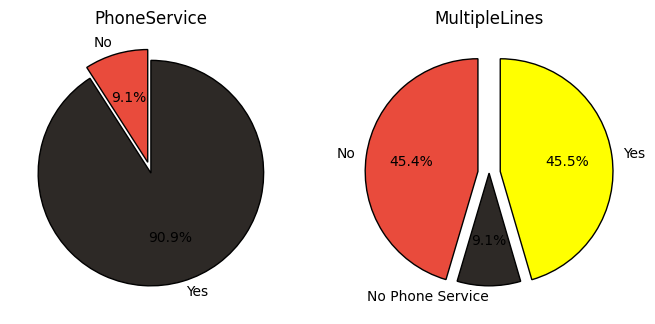

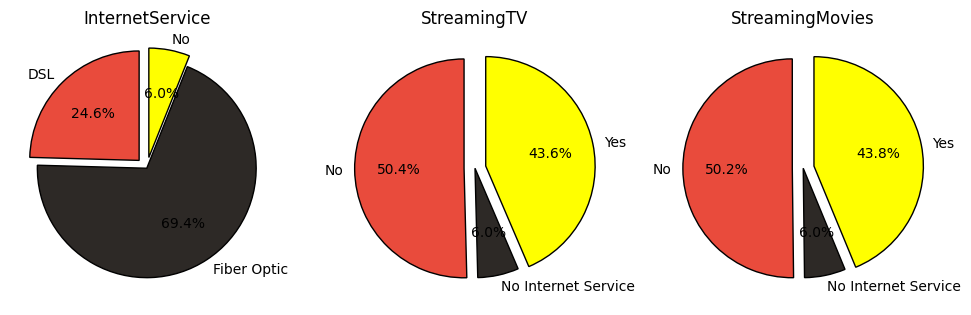

In [22]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');


Despite providing PhoneService, a high percentage of customers have switched!

Similarly, availability of MultipleLines did not matter, as customer unsubscription was carried out regardless!

Customers definitely did not appreciate the approach of Fiber Optic cables for providing InternetService with a solid 70% opting out from the services!

For StreamingTV & StreamingMovies, customers without these services definitely cancelled their subscription, however an average of 43.7% of customers switched despite consuming the streaming content.

### Group 2: Services Subscribed by the Customer :
        
OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

In [23]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

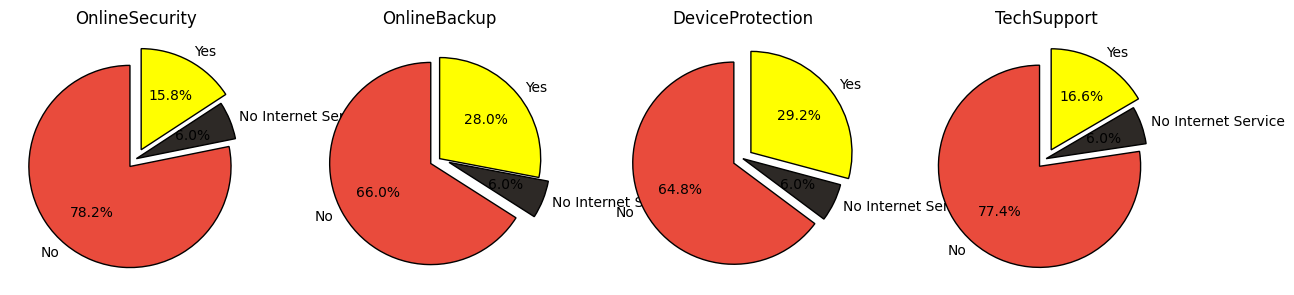

In [24]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');


Above pie charts stress out the significance of providing OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as an average of 71.6% customers cutoff their services due to lack of these features!

### Group 3 : Contract | PaperlessBilling | PaymentMethod |

In [25]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

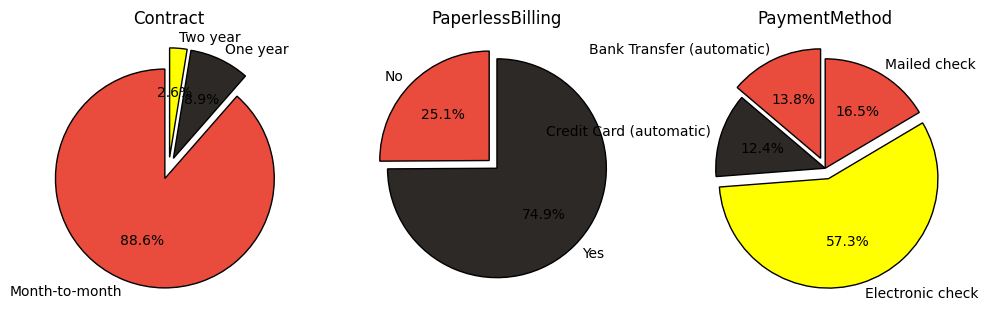

In [26]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');


Month-to-Month Contract duration has the dominating share when it comes churning with a massive 88.6% customers!

PaperlessBilling does not seemed to be appreciated by the customers!

Electronic check definitely needs to be sorted as it accounts for 57.3% of churn. It is then followed by Mailed check, Bank Transfer (automatic) & Credit Card (automatic)!

## Numerical Features :
    
Distribution of Numerical Features :

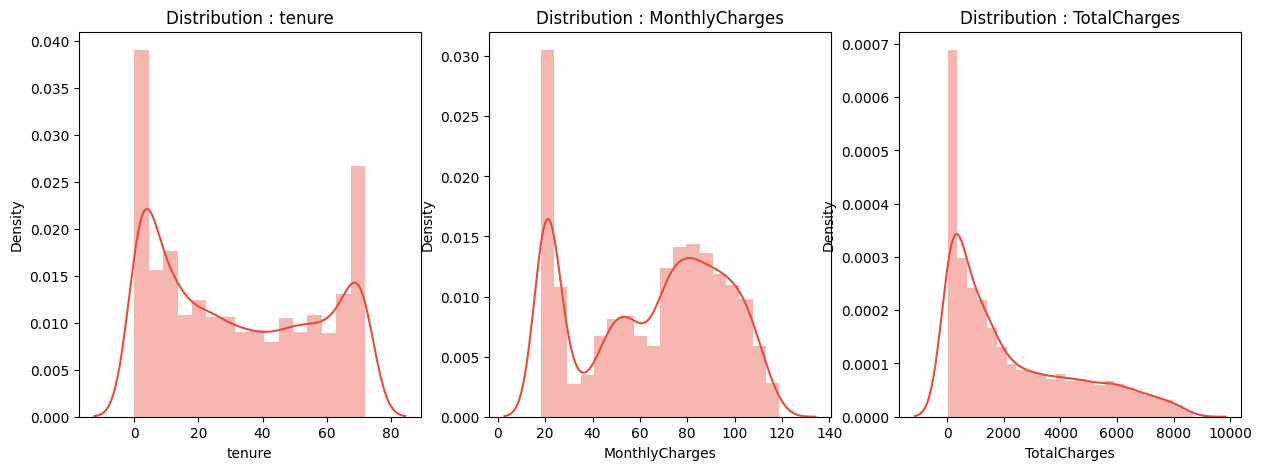

In [27]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

tenure and MonthlyCharges kind of create a bimodal distribution with peaks present at 0 - 70 and 20 - 80 respectively.

TotalCharges displays a positively or rightly skewed distribution.

## Numerical Features w.r.t Target Variable (Outcome) :

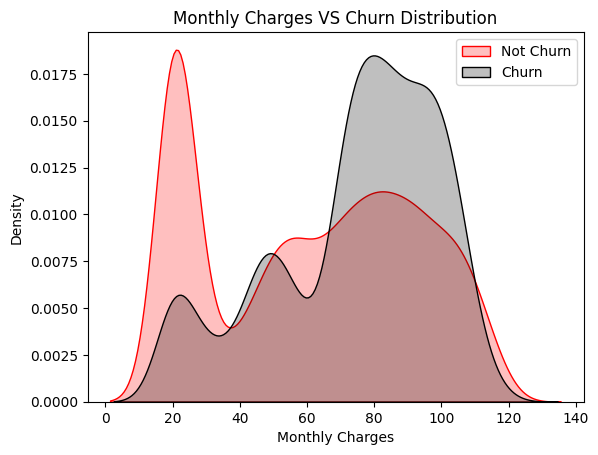

In [28]:
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1) ],
                ax =ax, color="Black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution');

High Monthly Charges are also one of a reason which makes Customers more likely to churn

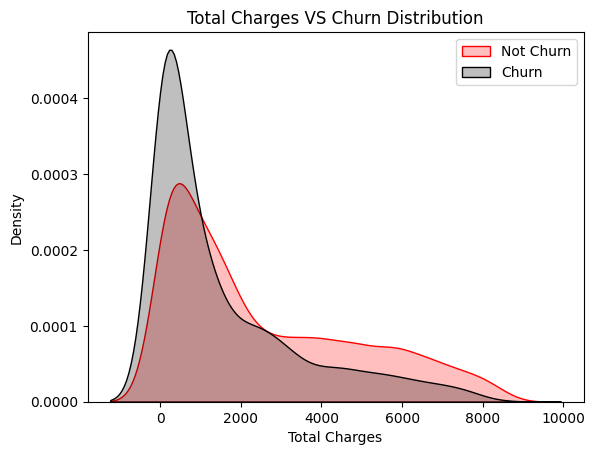

In [29]:
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 0) ],
                color="red", shade = True);
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1) ],
                ax =ax, color="black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

High Total Charges are also one of a reason which makes Customers more likely to churn,there might be an issue with pricing system which needs to addressed

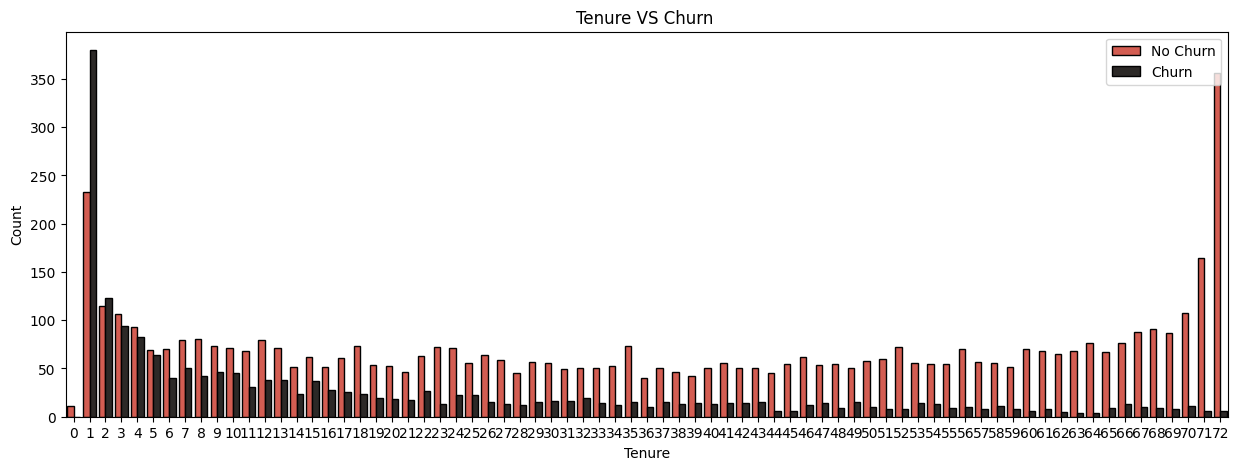

In [30]:
plt.figure(figsize = (15,5))
sns.countplot(x='tenure', data=df1, hue='Churn', palette = colors, edgecolor='black')
plt.title('Tenure VS Churn ')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.show()

Considering tenure, a high number of customers have left after the 1st month. This high cancellation of services continues for 4 - 5 months but the churn customers have reduced since the 1st month. As the tenure increases, customers dropping out decreases.

This results in low customer churning as the tenure increases. It displays a symmetrical graph with the left side dominating with churn numbers and right side dominating with low churn numbers.

## Numerical features vs Numerical features w.r.t Target variable (Churn) :

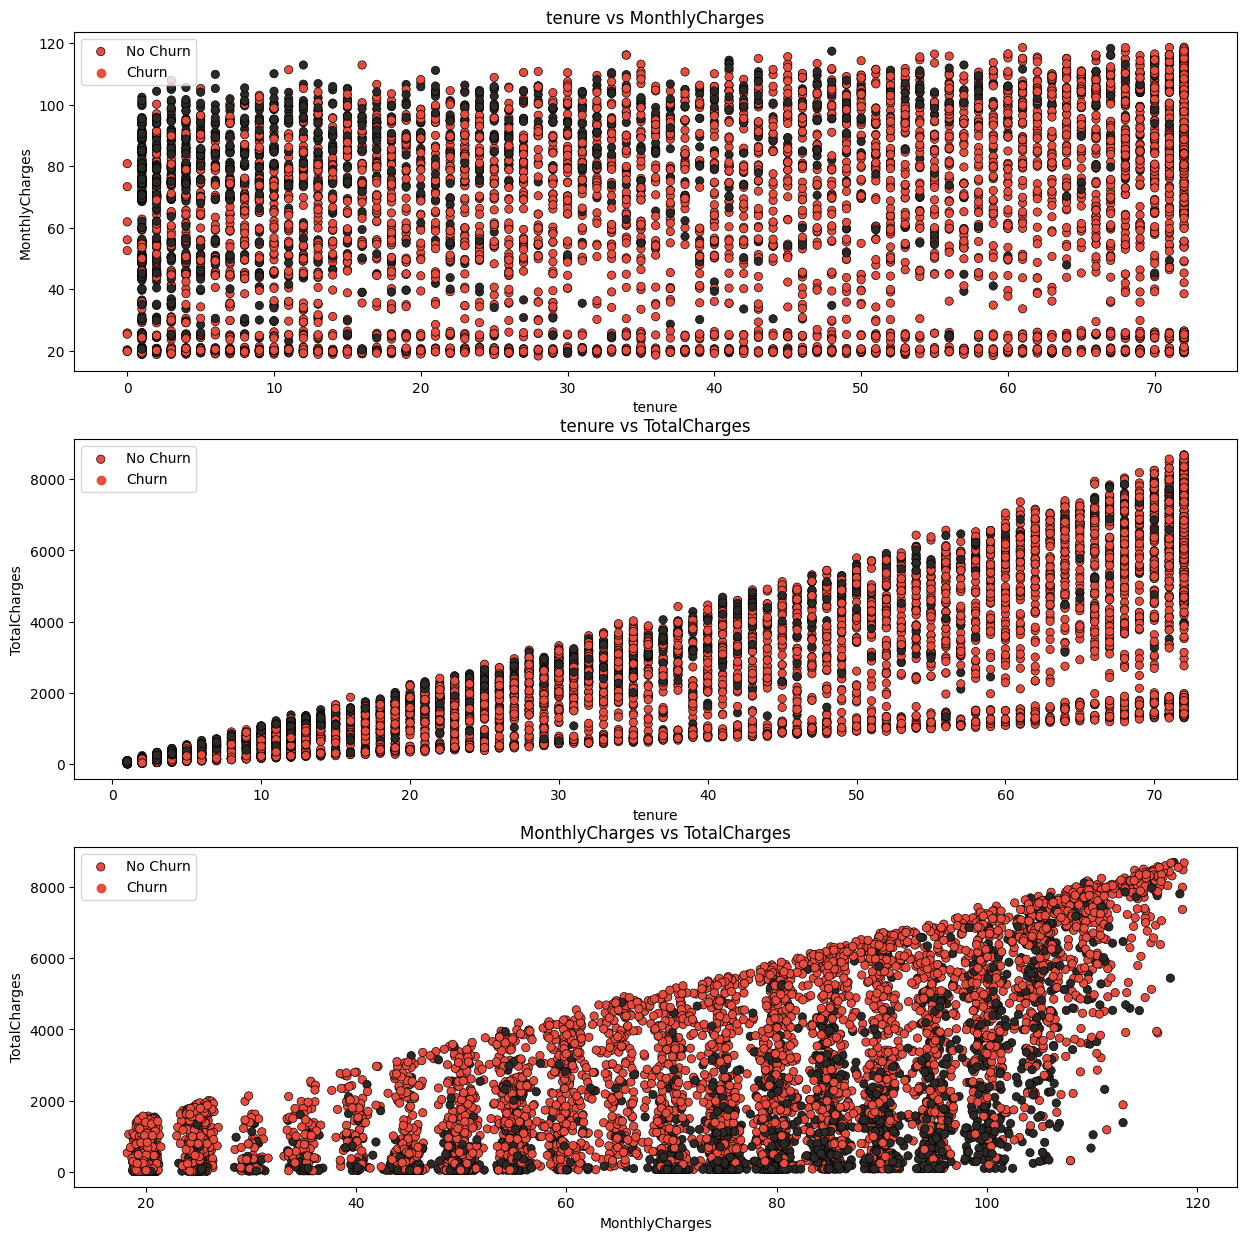

In [31]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df1,hue = 'Churn',palette = colors,edgecolor = 'black');
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

For tenure of 0 - 20 months period, churning of customers quite at any MonthlyCharges values. For a tenure period from 20 - 60 months, customers at the top end of the MonthlyCharges values, 70 - 120, start to drop out from the services.

For TotalCharges vs tenure, as tenure increases, TotalCharges increase as well! Customers opting out from their plans are the ones who are charged the highest of their tenure period alongwith a few customers whose Total Charges rank in the middle!

Customers seemed to have decided to cancel their subscriptions when the MonthlyCharges reach 70 and above.

# Summary Of EDA

##### Values of features for customer churn cases :
    
Categorical Features (Order) :
    
gender : Male = Female
    
SeniorCitizen : No SeniorCitizen > SeniorCitizen
    
Partner : No Partner > Partner
    
Dependents : No Dependent > Dependent
    
PhoneService : PhoneService > No PhoneService
    
MultipleLines : MultipleLines > No MultipleLines > No PhoneService
    
InternetService : Fiber Optic > DSL > No InternetService
    
OnlineSecurity : Absent > Present > No InternetService
    
OnlineBackup : Absent > Present > No InternetService
    
DeviceProtection : Absent > Present > No InternetService
    
TechSupport : Absent > Present > No InternetService
    
StreamingTV : Absent > Present > No InternetService
    
StreamingMovies : Absent > Present > No InternetService
    
Contract : Month-to-Month > One year > Two year
    
PaperlessBilling : Present > Absent
    
PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!

According to the EDA, these order / range of values results in customer churn!

# Feature Engineering

## Data Balancing using SMOTE :
In order to cope with unbalanced data, there are 2 options :

Undersampling : Trim down the majority samples of the target variable.

Oversampling : Increase the minority samples of the target variable to the majority samples.

After doing trial-error with undersampling & oversampling, we have decided to go with oversampling!

For data balancing, we will use imblearn.

In [32]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer

In [33]:
cols = list(df1.columns)
cols.remove('Churn')

x = df1.loc[:,cols]
y = df1.loc[:,'Churn']


imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

over = SMOTE(sampling_strategy = 1)

x1,y1 = over.fit_resample(x,y)
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y1))



Class distribution before SMOTE: Counter({0: 5174, 1: 1869})
Class distribution after SMOTE: Counter({0: 5174, 1: 5174})


## Data Leakage :

Data Leakage is the problem when the information outside the training data is used for model creation. It is one of the most ignored problem.

In order to create robust models, solving data leakage is a must! Creation of overly optimistic models which are practically useless & cannot be used in production have become common.

Thus, in order to avoid Data Leakage, it is advised to use train-test-split before any transformations. Execute the transformations according to the training data for the training as well as test data. 

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 2)


## Correlation Matrix :


In [35]:
# Creating a DataFrame from x_train
x_train_df = pd.DataFrame(x_train, columns=cols)

# Creating a DataFrame for y_train
y_train_df = pd.DataFrame({'Churn': y_train})

# Concatenate x_train_df and y_train_df along columns
x_train_test = pd.concat([x_train_df, y_train_df], axis=1)

In order to visualize the correlation matrix, we create a new dataframe that contains values from x_train & y_train.

Thus, we reject anything outside the training data to avoid data leakage.

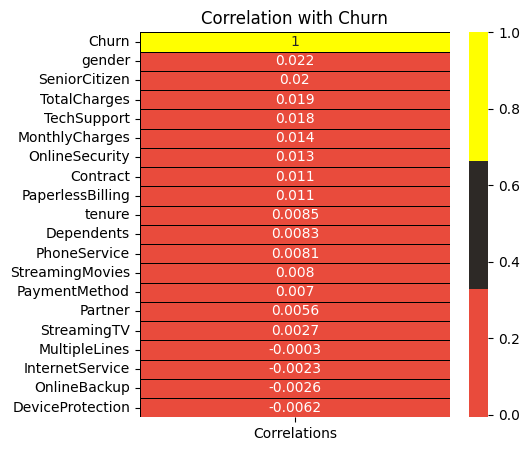

In [36]:
# Calculate correlation matrix
corr = x_train_test.corr()['Churn'].sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Plot heatmap
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')
plt.title('Correlation with Churn')
plt.show()

MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService does not display any kind of correlation. We drop the features with correlation coefficient.

Remaining features either display a significant positive or negative correlation.

### Feature Selection for Categorical Features :

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

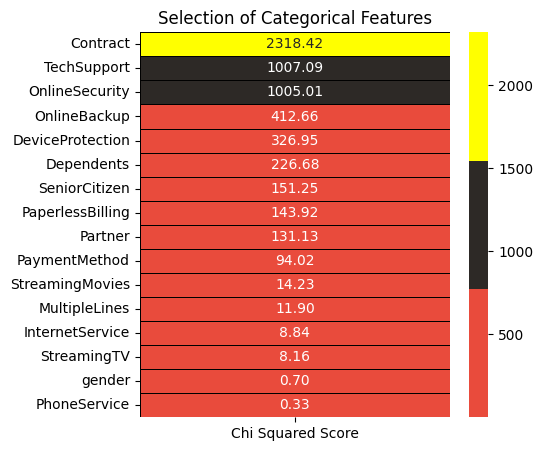

In [38]:
#Chi-Squared Test :

features = x_train_df.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService display a very low relation with Churn.

### Feature Selection for Numerical Features :

In [39]:
from sklearn.feature_selection import f_classif

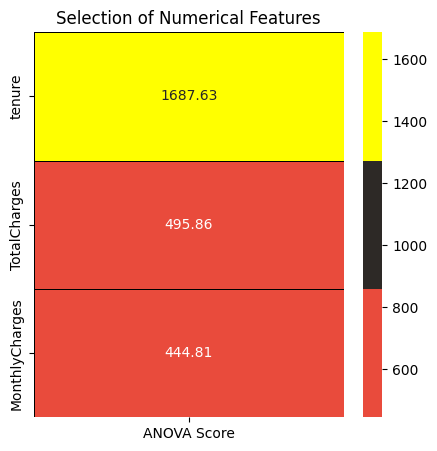

In [40]:
#ANOVA Test :

from sklearn.feature_selection import f_classif

features = x_train_df.loc[:,numerical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

According to the ANOVA test, higher the value of the ANOVA score, higher the importance of the feature.

From the above results, we need to include all the numerical features for modeling.

In [41]:
x_train=x_train_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'])
x_test_df = pd.DataFrame(x_test, columns=cols)
x_test=x_test_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'])


## Data Scaling :

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()  # Min-Max Scaling
ss = StandardScaler()  # Standardization

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

x_train[columns_to_scale] = mms.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = mms.transform(x_test[columns_to_scale])

Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

Eg : Age = Years; FastingBS = mg / dl; Charges = Currency

We have 2 options for data scaling : 1) Normalization 2) Standardization. As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.

Normalization : tenure, MonthlyCharges and TotalCharges features are normalized as they displayed a right skewed and bimodal data distribution.

Standardization : None of the features are standardized for the above data.

# Modeling

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

Selecting the features from the above conducted tests and splitting the data into 80 - 20 train - test groups.

In [44]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    
    accuracy =classifier.score(x_test,y_test)
    print("Accuracy is :",accuracy)
    
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

    

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    plt.figure(figsize=(4,3))
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

## Logistic Regression Classifier

Accuracy is : 0.770048309178744
Cross Validation Score :  84.67%
ROC_AUC Score :  77.03%
--------------------------------------------------------------------------------


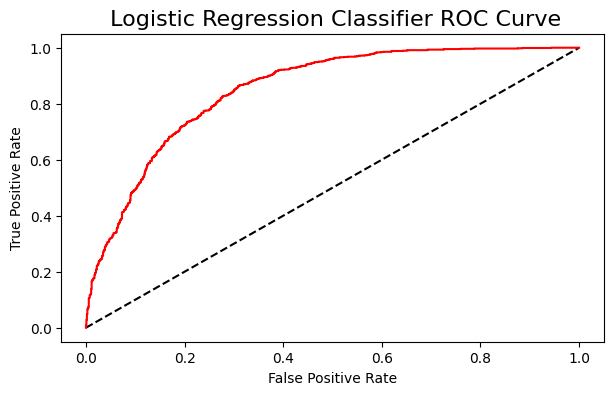

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1040
           1       0.75      0.81      0.78      1030

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



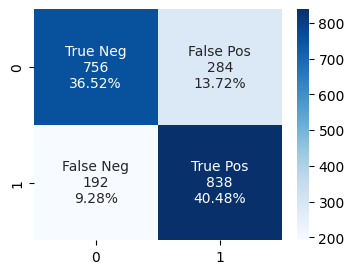

In [45]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

model(classifier_lr,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_lr,x_test,y_test)

## Decision Tree Classifier :

Accuracy is : 0.8004830917874396
Cross Validation Score :  86.32%
ROC_AUC Score :  80.07%
--------------------------------------------------------------------------------


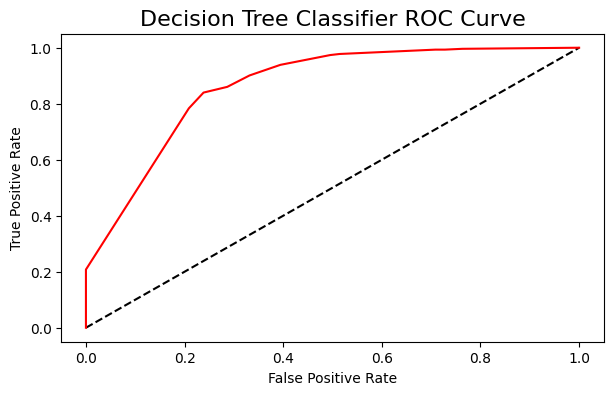

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1040
           1       0.78      0.84      0.81      1030

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



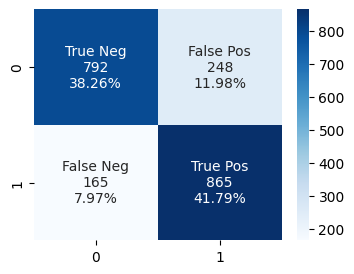

In [46]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_dt.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_dt,x_test,y_test)

## Random Forest Classifier :

Accuracy is : 0.8096618357487922
Cross Validation Score :  89.79%
ROC_AUC Score :  81.00%
--------------------------------------------------------------------------------


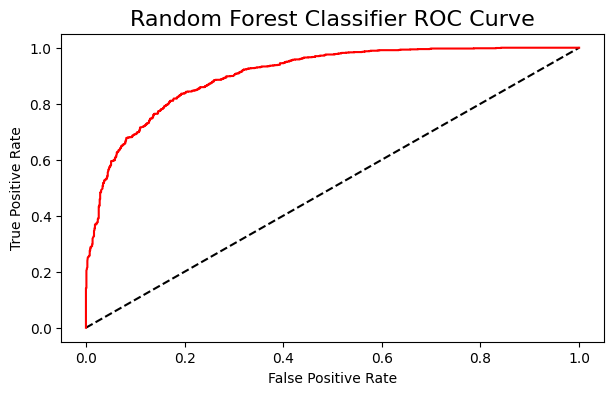

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1040
           1       0.77      0.87      0.82      1030

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



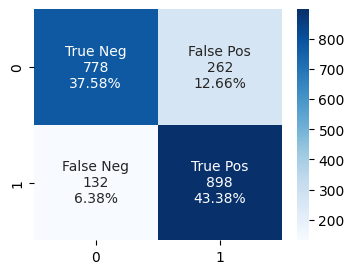

In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_rf,x_test,y_test)

## Xgboost Classifier :

Accuracy is : 0.8565217391304348
Cross Validation Score :  93.88%
ROC_AUC Score :  85.65%
--------------------------------------------------------------------------------


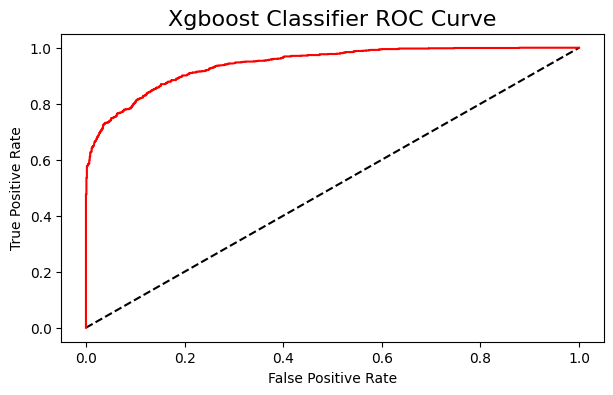

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1040
           1       0.86      0.85      0.86      1030

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



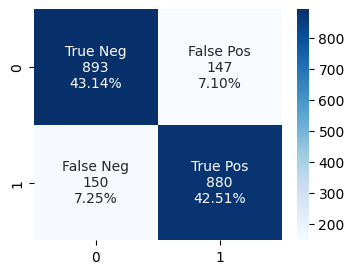

In [48]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Xgboost Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xgboost Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_xgb,x_test,y_test)

# Algorithm Results Table

In [49]:
data = {
    'ML Algorithm': ['XGBClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegressionClassifier'],
    'Accuracy': [85.70, 81.01, 79.46, 77.43],
    'Cross Validation Score': [93.84, 89.91, 86.07, 84.70],
    'ROC AUC Score': [85.70, 81.04, 79.48, 77.46],
    'F1 Score (Churn)': [86, 82, 80, 78]
}

results_df = pd.DataFrame(data)
results_df


,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score,F1 Score (Churn)
0,XGBClassifier,85.70,93.84,85.70,86
1,RandomForestClassifier,81.01,89.91,81.04,82
2,DecisionTreeClassifier,79.46,86.07,79.48,80
3,LogisticRegressionClassifier,77.43,84.70,77.46,78


# Measures for Reducing Customer Churn & Revenue Increase

- 3 types of customers should be targeted : SeniorCitizen, Living with a Partner, living all alone!

- The number of SeniorCitizen customers are low but their lowerlimit of MonthlyCharges is higher than the other customers. Thus, SeniorCitizen customers are ready to pay top dollar but they need to catered with that level of service. For customers with a Partner as well as customers living alone, they prefer services with MonthlyCharges below 65.

- Inorder to create a strong foundation of customers, Telco Company needs to create an easy and affordable entry point for their services. For the tenure of 1st 6 months, it needs to focus extensively on OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as this period is the most critical and uncertain for the customers. They must lower the churn tenure of 40 - 50 months for these services!.

- StreamingTV and StreamingMovies need to be made affordable as well as reducing it's churn tenure. The content of these services should be targeting all types of customers. This needs to followed up with an easy and hassle free PaymentMethod.

- It needs to put an end to the Electronic check for payment purposes due to it's high churn and focus entirely on Bank Transfer (automatic) & Credit Card (automatic)! However, they will be challenged to reduce the median churn tenure of above 20 months for these 2 PaymentMethod which is double the churn tenure of Electronic check.

- Lower limit of Electronic check is around 60 whereas that of Bank Transfer (automatic) & Credit Card (automatic) is around 20 in MonthlyCharges. PaperlessBilling is another expensive feature with a starting point of 60 whereas the other options are cheap starting at 20 in MonthlyCharges.

- Once the MonthlyCharges for any single service hits the 70 mark, customers become very conscious about their MonthlyCharges. Quality of service needs to be the USP of the Telco Company! These measures will push the revenue as well as improve the current value delivery process!

# Conclusion

- This is a great dataset that gives an opportunity to peak into the real world business problem and can be dealt with the Data Science techniques.

- Insights gained from the EDA are very valuable for understanding the effectiveness of the existing systems that are in place. They also assist in drawing up plans & measures to counter the problems or be in an infinite loop for improvement.

- SMOTE analysis is used for data balancing. Combinations of undersampling and oversampling can be employed as well. Undersampling was tried out for this problem but it landed the F1 Score (Churn) in the range of 60 - 70 %. There are other data balancing methods available as well.

- When it comes to model performance, feature creation by combining features was carried out however, they did not outperform the current models. Hyperparamter tuning & outlier detection could also bump up the F1 Score (Churn) & Cross Validation Score.